In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv("StudentsPerformanceData.csv")
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


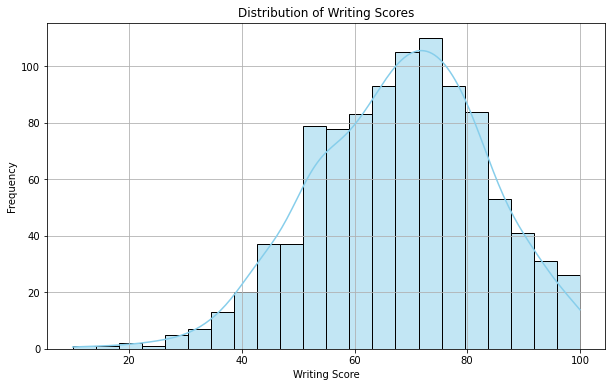

In [6]:
# Distribution of writing scores
plt.figure(figsize=(10, 6))
sns.histplot(df['writing score'], kde=True, color='skyblue')
plt.title('Distribution of Writing Scores')
plt.xlabel('Writing Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

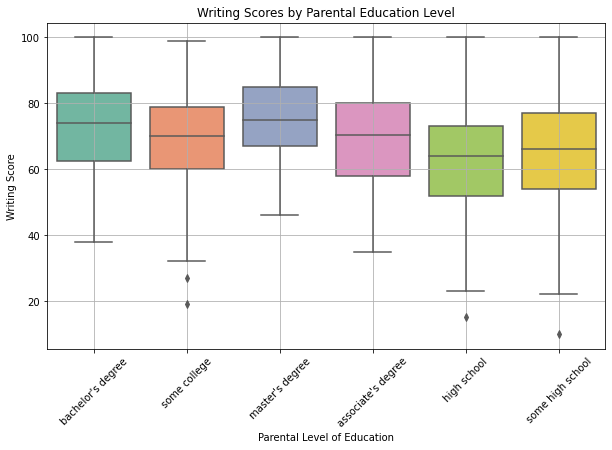

In [9]:
# Parental education and writing scores
plt.figure(figsize=(10, 6))
sns.boxplot(x='parental level of education', y='writing score', data=df, palette='Set2')
plt.title('Writing Scores by Parental Education Level')
plt.xlabel('Parental Level of Education')
plt.ylabel('Writing Score')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [14]:
# To get more technical I am now preparing the data for machine learning and Encoding categorical variables
df_encoded = pd.get_dummies(df, columns=['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course'], drop_first=True)

# Separating the features and target variable in the code below
X = df_encoded.drop(['math score', 'reading score', 'writing score'], axis=1)
y = df_encoded['writing score']

# Making the training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Trainign and then initializing a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 177.45215122816708


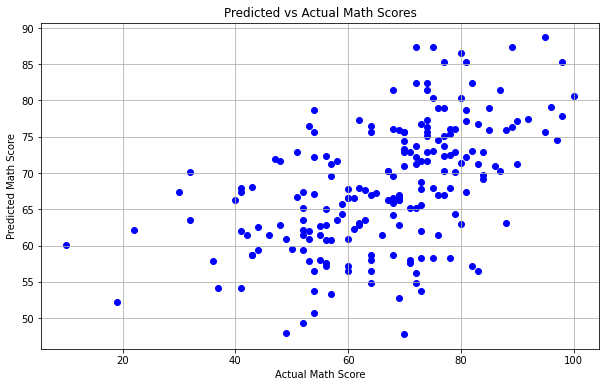

In [16]:
# Plot for the predicted vs actual writing scores
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.title('Predicted vs Actual Math Scores')
plt.xlabel('Actual Math Score')
plt.ylabel('Predicted Math Score')
plt.grid(True)
plt.show()

Seems like a positive correlation here